In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Check
df = pd.read_csv("./Sales_Data/Sales_January_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Merge all data files in one file

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

combined_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    combined_data = pd.concat([combined_data, current_data])
    
combined_data.to_csv("combined_sales_data.csv", index=False)

### Read new combined data

In [4]:
sales_data = pd.read_csv("./combined_sales_data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

##### Drop All NaN Rows

In [5]:
# Find NAN
nan_df = sales_data[sales_data.isna().any(axis=1)]
display(nan_df.head())

sales_data = sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or']

In [7]:
# Correct columns data types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

### Add Month and Sales Column for easy analysis

In [8]:
sales_data['Month'] = sales_data['Order Date'].str[0:2]
sales_data['Month'] = sales_data['Month'].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [9]:
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

### Add City Column

In [10]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]
    
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Data Exploration

#### Best month for sale and how much sale is done in that month

In [11]:
sales_data.groupby(['Month']).sum()["Total Sales"]

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

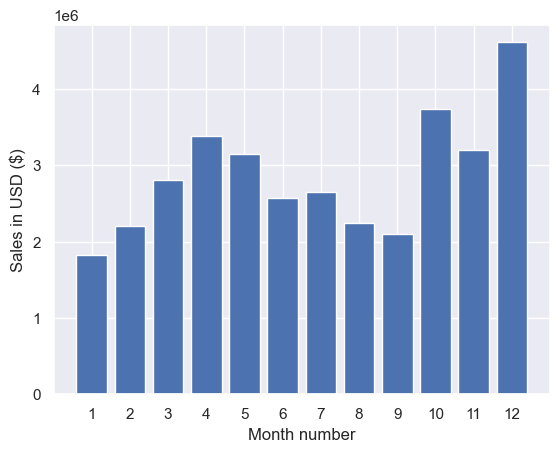

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
months = range(1,13)

plt.bar(months,sales_data.groupby(['Month']).sum()['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Which city has most sales

In [13]:
sales_data.groupby(['City']).sum()["Total Sales"]

City
Atlanta  (GA)          2795498.58
Austin  (TX)           1819581.75
Boston  (MA)           3661642.01
Dallas  (TX)           2767975.40
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Portland  (ME)          449758.27
Portland  (OR)         1870732.34
San Francisco  (CA)    8262203.91
Seattle  (WA)          2747755.48
Name: Total Sales, dtype: float64

#### What time should you advertise so that customers are likey to buy

In [14]:
# Add hour column
sales_data['Hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour
sales_data['Minute'] = pd.to_datetime(sales_data['Order Date']).dt.minute
sales_data['Count'] = 1
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


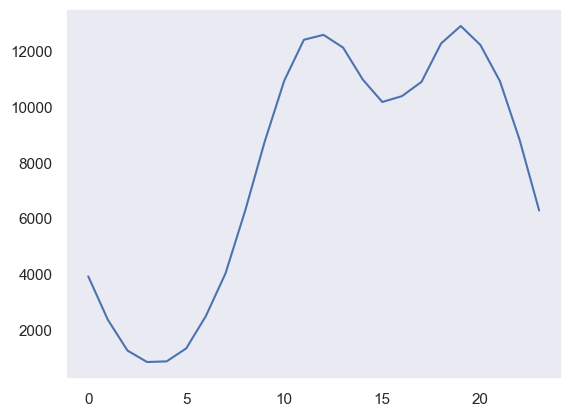

In [15]:
keys = [pair for pair, df in sales_data.groupby(['Hour'])]

plt.plot(keys, sales_data.groupby(['Hour']).count()['Count'])
plt.grid()
plt.show()

# Best time to advertise will be around 10AM to 1PM and 6PM to 8PM

#### What products are often sold together

In [16]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [17]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What products are sold most and why

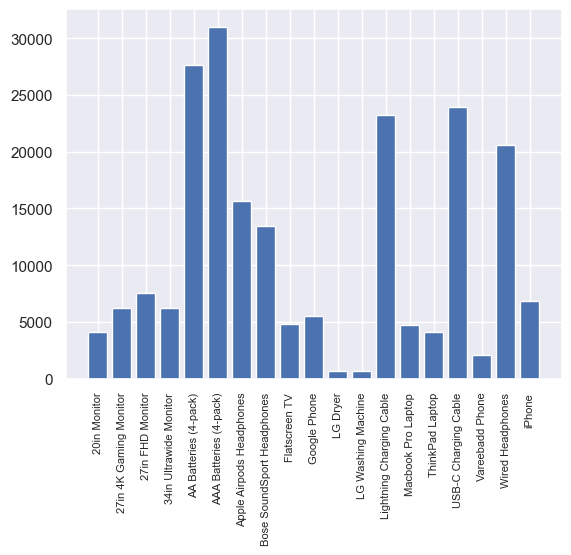

In [18]:
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()